# LUNG CANCER PREDICTION MODEL

Cancer is a disease in which cells in the body grow out of control. When cancer starts in the lungs, it is called lung cancer. Lungs are two spongy organs in the chest that takes in oxygen during inhalation and releases carbon dioxide during exhalation. Lung cancer is the leading cause of cancer deaths worldwide.

### Types of lung cancer
There are 2 main types of lung cancer.

### Non-small cell lung cancer (NSCLC)
About 80% to 85% of lung cancers are NSCLC. The main subtypes of NSCLC are adenocarcinoma, squamous cell carcinoma, and large cell carcinoma. These subtypes, which start from different types of lung cells, are grouped together as NSCLC because their treatment and prognoses (outlook) are often similar.

#### Adenocarcinoma
Adenocarcinomas start in the cells that would normally secrete substances such as mucus.
This type of lung cancer occurs mainly in people who smoke or used to smoke, but it is also the most common type of lung cancer seen in people who don't smoke. It is more common in women than in men, and it is more likely to occur in younger people than other types of lung cancer.

#### Squamous cell carcinoma
Squamous cell carcinomas start in squamous cells, which are flat cells that line the inside of the airways in the lungs. They are often linked to a history of smoking and tend to be found in the central part of the lungs, near a main airway (bronchus).

#### Large cell (undifferentiated) carcinoma
Large cell carcinoma can appear in any part of the lung. It tends to grow and spread quickly, which can make it harder to treat. 

### Small cell lung cancer (SCLC)
About 10% to 15% of all lung cancers are SCLC. It is sometimes called oat cell cancer. 
This type of lung cancer tends to grow and spread faster than NSCLC. In most people with SCLC, the cancer has already spread beyond the lungs at the time it is diagnosed.

### Other types of lung tumors
Along with the main types of lung cancer, other tumors can occur in the lungs.

#### Lung carcinoid tumors
Carcinoid tumors of the lung account for fewer than 5% of lung tumors. Most of these grow slowly. For more information about these tumors, see Lung Carcinoid Tumor.

#### Other lung tumors
Other types of lung cancer such as adenoid cystic carcinomas, lymphomas, and sarcomas, as well as benign lung tumors such as hamartomas are rare. These are treated differently from the more common lung cancers and are not discussed here.

#### Cancers that spread to the lungs
Cancers that start in other organs (such as the breast, pancreas, kidney, or skin) can sometimes spread (metastasize) to the lungs, but these are not lung cancers.


The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system.

Attribute information:

Gender: M(male), F(female)
Age: Age of the patient
Smoking: YES=2 , NO=1.
Yellow fingers: YES=2 , NO=1.
Anxiety: YES=2 , NO=1.
Peer_pressure: YES=2 , NO=1.
Chronic Disease: YES=2 , NO=1.
Fatigue: YES=2 , NO=1.
Allergy: YES=2 , NO=1.
Wheezing: YES=2 , NO=1.
Alcohol: YES=2 , NO=1.
Coughing: YES=2 , NO=1.
Shortness of Breath: YES=2 , NO=1.
Swallowing Difficulty: YES=2 , NO=1.
Chest pain: YES=2 , NO=1.
Lung Cancer: YES , NO.

In [63]:
# import necessary libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

# DATA IMPORTATION

In [64]:
# parsing the data into a dataframe
df = pd.read_csv("survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# DATA WRANGLING

In [65]:
df.shape

(309, 16)

The dataset has 308 rows and 16 attribute

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [67]:
# check for duplicate values
df.duplicated().sum()

33

In [68]:
df.drop_duplicates(inplace=True)

In [69]:
# check for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

There are no null values.

# EXPLORATORY DATA ANALYSIS

In [70]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


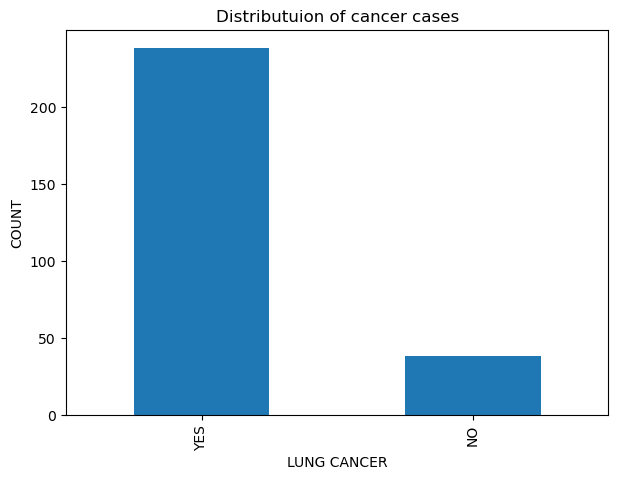

In [71]:
plt.figure(figsize=(7,5))
df['LUNG_CANCER'].value_counts().plot(kind="bar")
plt.xlabel("LUNG CANCER")
plt.ylabel("COUNT")
plt.title("Distributuion of cancer cases")
plt.show()

This shows that the dataset has an higher number of positive lung cancer cases than negative cases.

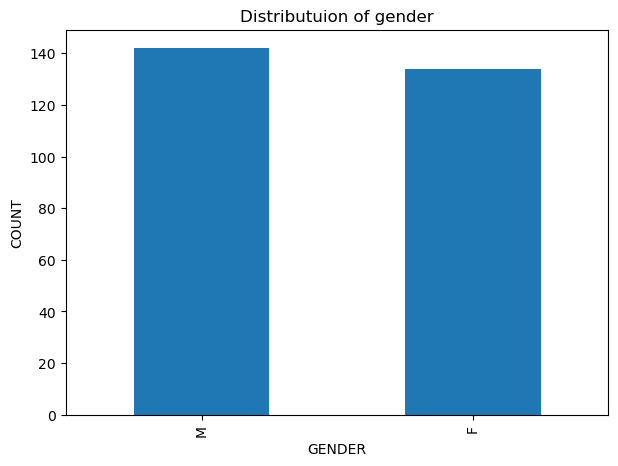

In [72]:
plt.figure(figsize=(7,5))
df['GENDER'].value_counts().plot(kind="bar")
plt.xlabel("GENDER")
plt.ylabel("COUNT")
plt.title("Distributuion of gender")
plt.show()

The gender distribution is almost equal. There is only a slight difference.

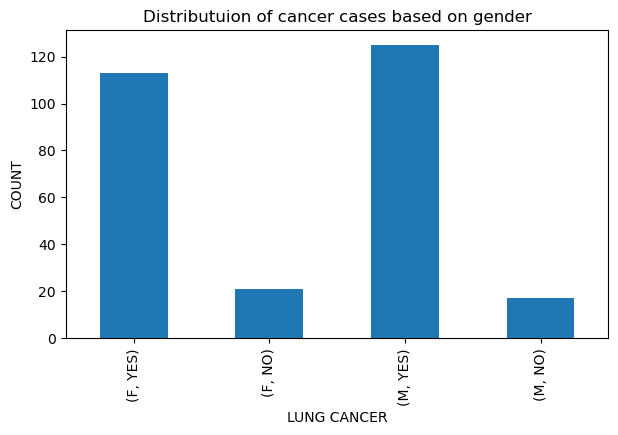

In [73]:
plt.figure(figsize=(7,4))
df['LUNG_CANCER'].groupby(df["GENDER"]).value_counts().plot(kind="bar")
plt.xlabel("LUNG CANCER")
plt.ylabel("COUNT")
plt.title("Distributuion of cancer cases based on gender")
plt.show()

This shows that there are 113 females have cancer, 21 females do not have cancer, 125 males have cancer and 17 males do not have.

In [74]:
# creating a function
def countplot(x, y, title, data=df):
    """
    Function to plot a countplot

    x: variable(1)
    y: variables(2)
    title: title for the countplot
    data: dataframe
    """
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=x, hue=y)
    plt.title(title, fontsize=14)
    plt.show()

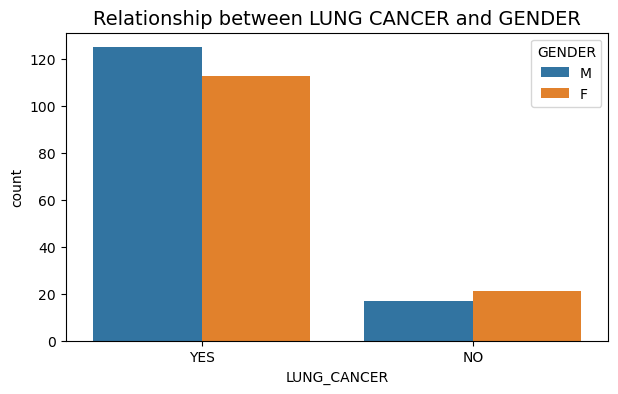

In [75]:
countplot(x="LUNG_CANCER", y="GENDER", title="Relationship between LUNG CANCER and GENDER")

This shows more males have lung cancer than females.

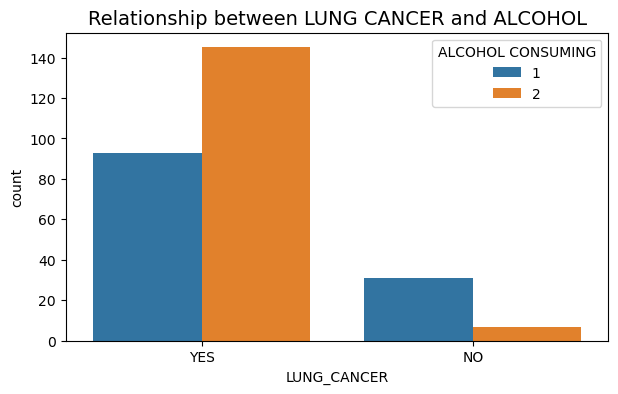

In [76]:
countplot(x="LUNG_CANCER", y="ALCOHOL CONSUMING", title="Relationship between LUNG CANCER and ALCOHOL")

A larger number of people that consumed alcohol developed lung cancer and only a few did not have lung cancer. Could alochol consumption be a risk factor?? 

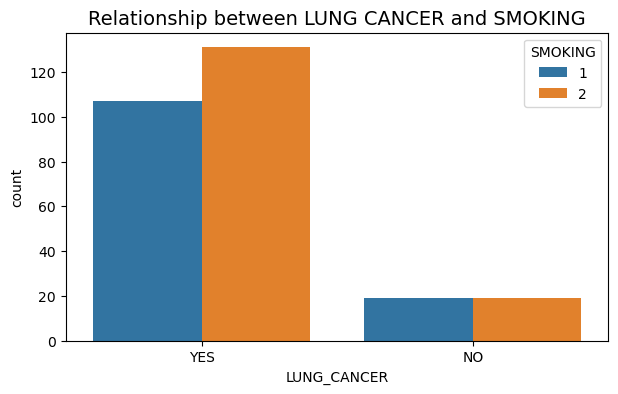

In [77]:
countplot(x="LUNG_CANCER", y="SMOKING", title="Relationship between LUNG CANCER and SMOKING")

A greater number of people that smokes developed lung cancer and only a few did not have lung cancer. Smoking has always being believed to be a risk factor of lung cancer.

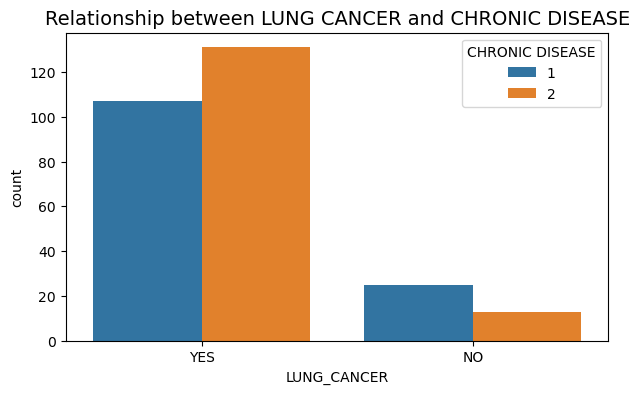

In [78]:
countplot(x="LUNG_CANCER", y="CHRONIC DISEASE", title="Relationship between LUNG CANCER and CHRONIC DISEASE")

This shows that a good number of people who have a chronic disease also developed lung cancer. this could be as a result of immunosuppression that occurs in people with chronic diseases.

C:\Users\dayoa\AppData\Local\Temp\ipykernel_21612\3509659678.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["AGE"], bins=50)


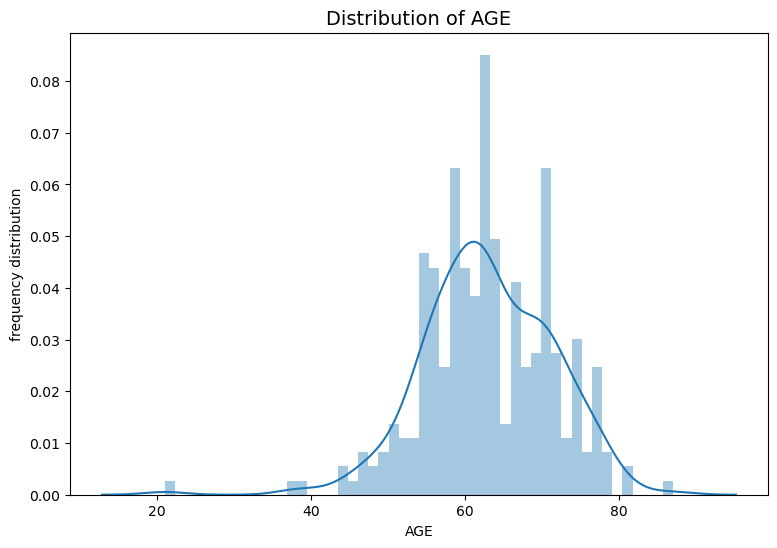

In [79]:
# using distplot to examine distribution of Bmi
plt.figure(figsize=(9,6))
sns.distplot(df["AGE"], bins=50)
plt.xlabel("AGE")
plt.ylabel("frequency distribution")
plt.title("Distribution of AGE", fontsize=14);

The age distribution curve does not show a normal gaussian curve.

# DATA PREPROCESSING

There is need to group the "AGE" column so as to reduce the number of unique values and help our model perform better.

In [80]:
print("minimum age is:", df['AGE'].min())
print("maximum age is:", df['AGE'].max())

minimum age is: 21
maximum age is: 87


In [81]:
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
# Create a new column 'AGE_GROUP' based on the specified bins and labels
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_GROUP
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,61-70
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,71-80
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,51-60
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,61-70
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,61-70


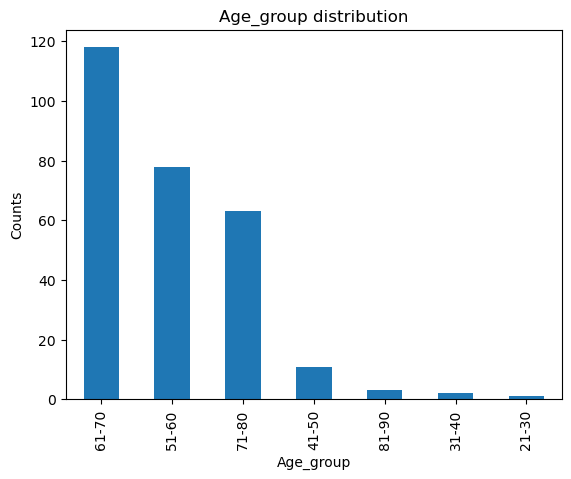

In [82]:
df['AGE_GROUP'].value_counts().plot(kind="bar")
plt.xlabel("Age_group")
plt.ylabel("Counts")
plt.title("Age_group distribution")
plt.show()

This shows that the dataset has majority of cases between the ages 61 and 70

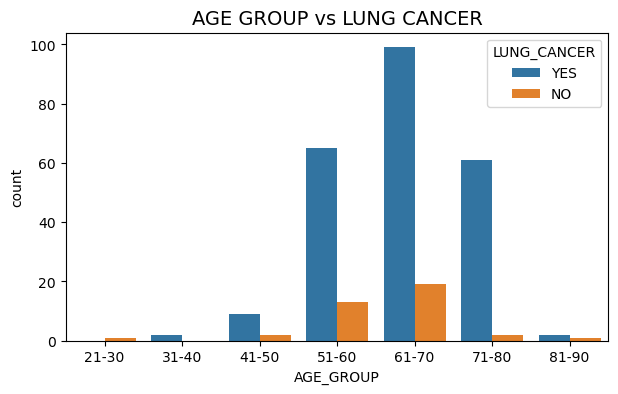

In [83]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="AGE_GROUP", hue="LUNG_CANCER")
plt.title("AGE GROUP vs LUNG CANCER", fontsize=14)
plt.show()

There are more positives cases recorded for ages between 61-70. This could be due to age_group 61-70 being the majority of the data collected or due to old-age being a great risk factor.

In [84]:
df.drop(["AGE"], axis=1, inplace=True)
df.head()

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_GROUP
0,M,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,61-70
1,M,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,71-80
2,F,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,51-60
3,M,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,61-70
4,F,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,61-70


In [85]:
# To get the data types of each column
df.dtypes

GENDER                     object
SMOKING                     int64
YELLOW_FINGERS              int64
ANXIETY                     int64
PEER_PRESSURE               int64
CHRONIC DISEASE             int64
FATIGUE                     int64
ALLERGY                     int64
WHEEZING                    int64
ALCOHOL CONSUMING           int64
COUGHING                    int64
SHORTNESS OF BREATH         int64
SWALLOWING DIFFICULTY       int64
CHEST PAIN                  int64
LUNG_CANCER                object
AGE_GROUP                category
dtype: object

Since "GENDER" column is in object type there is need to convert to integer. 1 being male and 0 being female.

In [86]:
df['GENDER'] = df['GENDER'].map({'M':1,'F':0})
df['GENDER'].head()

0    1
1    1
2    0
3    1
4    0
Name: GENDER, dtype: int64

The target column "LUNG_CANCER" is also in object type. YES=1, NO=0.

In [87]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES':1,'NO':0})
df['LUNG_CANCER'].head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

Lastly, the age_group is in category type, there is need to hot-encode this column.

In [88]:
df1 = pd.get_dummies(df, dtype=int)
df1.head()

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,...,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_GROUP_21-30,AGE_GROUP_31-40,AGE_GROUP_41-50,AGE_GROUP_51-60,AGE_GROUP_61-70,AGE_GROUP_71-80,AGE_GROUP_81-90
0,1,1,2,2,1,1,2,1,2,2,...,2,2,1,0,0,0,0,1,0,0
1,1,2,1,1,1,2,2,2,1,1,...,2,2,1,0,0,0,0,0,1,0
2,0,1,1,1,2,1,2,1,2,1,...,1,2,0,0,0,0,1,0,0,0
3,1,2,2,2,1,1,1,1,1,2,...,2,2,0,0,0,0,0,1,0,0
4,0,1,2,1,1,1,1,1,2,1,...,1,1,0,0,0,0,0,1,0,0


### Train test split

In [89]:
X = df1.drop(["LUNG_CANCER"], axis=1)
y = df1["LUNG_CANCER"]
X.head()

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,...,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,AGE_GROUP_21-30,AGE_GROUP_31-40,AGE_GROUP_41-50,AGE_GROUP_51-60,AGE_GROUP_61-70,AGE_GROUP_71-80,AGE_GROUP_81-90
0,1,1,2,2,1,1,2,1,2,2,...,2,2,2,0,0,0,0,1,0,0
1,1,2,1,1,1,2,2,2,1,1,...,2,2,2,0,0,0,0,0,1,0
2,0,1,1,1,2,1,2,1,2,1,...,2,1,2,0,0,0,1,0,0,0
3,1,2,2,2,1,1,1,1,1,2,...,1,2,2,0,0,0,0,1,0,0
4,0,1,2,1,1,1,1,1,2,1,...,2,1,1,0,0,0,0,1,0,0


In [90]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
(X_train.shape), (y_train.shape), (X_test.shape), (y_test.shape)

((193, 21), (193,), (83, 21), (83,))

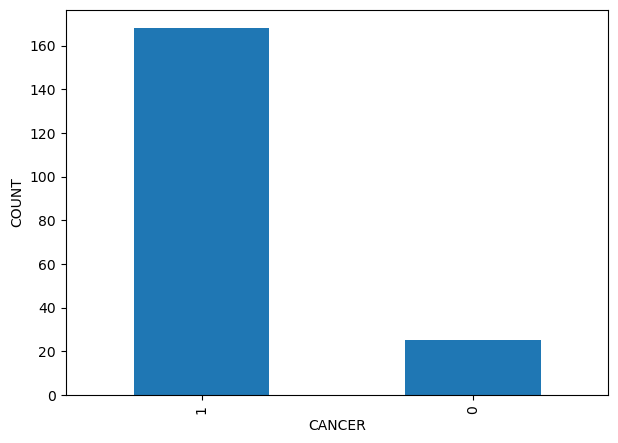

In [92]:
plt.figure(figsize=(7,5))
y_train.value_counts().plot(kind="bar")
plt.xlabel("CANCER")
plt.ylabel("COUNT")
plt.show()

This graph shows that the train data is imbalanced, there is need to perform oversampling.

### Data Oversampling

In [93]:
# instantiate Oversampler
sample = RandomOverSampler()
X_train_oversampled, y_train_oversampled = sample.fit_resample(X_train, y_train)
(X_train_oversampled.shape), (y_train_oversampled.shape)

((336, 21), (336,))

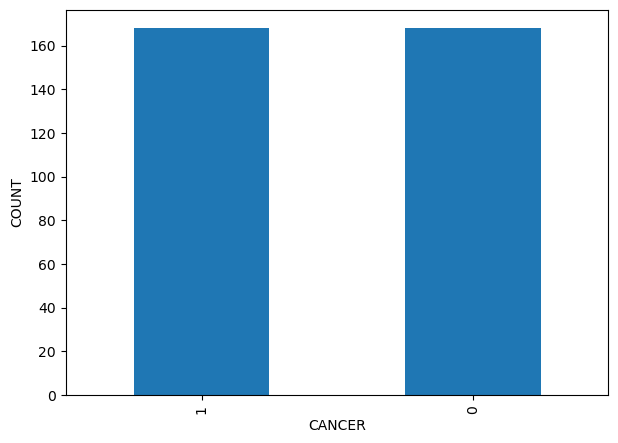

In [94]:
plt.figure(figsize=(7,5))
y_train_oversampled.value_counts().plot(kind="bar")
plt.xlabel("CANCER")
plt.ylabel("COUNT")
plt.show()

### Data Normalization

In [95]:
# instantiate MinMaxScaler
scale = MinMaxScaler()
scaled = scale.fit_transform(X_train_oversampled)
X_train_scaled = pd.DataFrame(scaled, columns=(X_train.columns))
X_test_scaled = pd.DataFrame(scale.transform(X_test), columns=(X_test.columns))
X_train_scaled.head()

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,...,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,AGE_GROUP_21-30,AGE_GROUP_31-40,AGE_GROUP_41-50,AGE_GROUP_51-60,AGE_GROUP_61-70,AGE_GROUP_71-80,AGE_GROUP_81-90
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# MODEL SELECTION

In [111]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(loss="binary_crossentropy",
             optimizer= tf.keras.optimizers.Adam(),
             metrics= tf.keras.metrics.Recall()
             )

# fit model
history = model.fit(X_train_scaled, y_train_oversampled, epochs=150)

Epoch 1/150
11/11 [==============================] - 1s 3ms/step - loss: 0.7027 - recall_3: 0.2917
Epoch 2/150
11/11 [==============================] - 0s 2ms/step - loss: 0.6957 - recall_3: 0.2857
Epoch 3/150
11/11 [==============================] - 0s 2ms/step - loss: 0.6902 - recall_3: 0.2798
Epoch 4/150
11/11 [==============================] - 0s 1ms/step - loss: 0.6849 - recall_3: 0.3036
Epoch 5/150
11/11 [==============================] - 0s 2ms/step - loss: 0.6798 - recall_3: 0.3452
Epoch 6/150
11/11 [==============================] - 0s 2ms/step - loss: 0.6739 - recall_3: 0.3988
Epoch 7/150
11/11 [==============================] - 0s 2ms/step - loss: 0.6673 - recall_3: 0.4821
Epoch 8/150
11/11 [==============================] - 0s 845us/step - loss: 0.6589 - recall_3: 0.6369
Epoch 9/150
11/11 [==============================] - 0s 2ms/step - loss: 0.6503 - recall_3: 0.7619
Epoch 10/150
11/11 [==============================] - 0s 2ms/step - loss: 0.6398 - recall_3: 0.7976
Epoch 1

# MODEL EVALUATION

In [112]:
model.evaluate(X_test_scaled, y_test)

3/3 [==============================] - 0s 0s/step - loss: 0.1260 - recall_3: 1.0000


[0.12602783739566803, 1.0]

In [113]:
y_hat = model.predict(X_test_scaled)

3/3 [==============================] - 0s 5ms/step


In [114]:
y_pred = []
for i in y_hat:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [115]:
y_pred[:5]

[0, 1, 1, 1, 0]

In [116]:
len(y_hat) == len(y_pred)

True

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.93      1.00      0.97        70

    accuracy                           0.94        83
   macro avg       0.97      0.81      0.86        83
weighted avg       0.94      0.94      0.93        83



The recall_score metric was used due to the desire to have lesser number of false negatives.
Being a medical context, it is safer to err on the side of caution as all predicted cases of lung cancer would be further evaluated by a medical practitioner.
A false negative result in the real world would create an illusion of being free from lung cancer and hence there would be no further testing to ascertain the result which could be really harmful.

#### Confusion Matrix

In [120]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

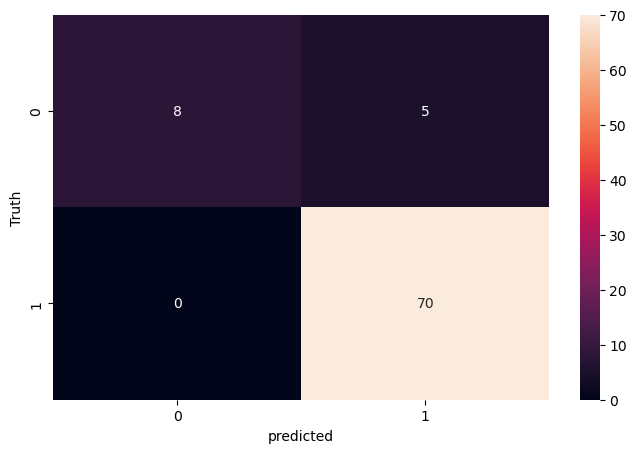

In [121]:
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("Truth")
plt.show()

This report shows:
True positives: 70,
True negatives: 8,
False postives: 0,
False negatives: 5